In [106]:
# Collect data for figures and tables
import collections

import compress_pickle
import itertools
import libsbml
import numpy as np
import os
import pickle
import pandas as pd
import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline  

BIOMD_12 = 'BIOMD0000000012.xml'
BASE_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/'
DATA_DIR = os.path.join(BASE_DIR, "DATA")
ALGO_DIR = os.path.join(DATA_DIR, "algo")
CHEBI_DIR = os.path.join(DATA_DIR, "chebi")
RHEA_DIR = os.path.join(DATA_DIR, "rhea")
BIOMODEL_DIR = os.path.join(DATA_DIR, "biomodels/curated_biomodels_31mar2021")
BIGG_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/DATA/bigg'
ecoli_fpath = os.path.join(BIGG_DIR, "e_coli_core.xml")

PROJ_DIR = os.path.join(os.getcwd(), os.pardir)
AMAS_DIR = os.path.join(PROJ_DIR, "AMAS")
sys.path.append(PROJ_DIR)

SUPPL_DIR = os.path.join(PROJ_DIR, os.pardir, "AMAS_suppl")
ACCURACY_DIR = os.path.join(SUPPL_DIR, "data_for_credibility")

from AMAS import species_annotation as sa
from AMAS import reaction_annotation as ra
from AMAS import recommender
from AMAS import constants as cn
from AMAS import iterator as it
from AMAS import tools

In [2]:
E_COLI_PATH = os.path.join(cn.TEST_DIR, 'e_coli_core.xml')
recom = recommender.Recommender(libsbml_fpath=E_COLI_PATH)

In [3]:
########## Result Table 1. ######################
#################################################


# TODO: first, get number of biomodels with annotations, 
# each for species and reactions; and for biomodels and BiGG

#################################################
# using csv data obtained from REF_ML, get
# 1. list (number) of (bio)models; numbers of total species/reactions
# 2. numbers of annotated species/reactions
#################################################

#################################################
# using csv data obtained from REF_ML, get
# 1. Prediction time (of the same biomodels)
# 2. Recall
# 3. Precision
#################################################


#################################################
# Can repeat this for BiGG models :) 
# But for BiGG, need to collect information again. 
#################################################

In [4]:
spec_ml_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'individual_species_accuracy.csv'))
spec_ml_df.head()

,model,name_length,num_candidates,num_formulas,match_score,accuracy
0,BIOMD0000000634.xml,3,6,5,1.000,1
1,BIOMD0000000634.xml,3,13,11,1.000,1
2,BIOMD0000000634.xml,3,14,12,1.000,1
3,BIOMD0000000152.xml,2,7,5,1.000,1
4,BIOMD0000000152.xml,15,1,1,0.873,0


In [59]:
spec_biomodels = np.unique(spec_ml_df['model'])
print("Number of Spec Models: %d" % len(spec_biomodels))
num_specs = dict()
num_spec_anoted = dict(collections.Counter(spec_ml_df['model']))
for idx, one_biomd in enumerate(spec_biomodels):
  if idx % 100 == 0:
    print("(running--- We are at %d.)" % idx)
  one_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  reader = libsbml.SBMLReader()
  document = reader.readSBML(one_fpath)
  model = document.getModel()
  num_specs[one_biomd] = model.getNumSpecies()
###

num_models = len(spec_biomodels)
print("Total number of models with at least one annotation: %d" % num_models)
#
ave_num_specs = np.mean([num_specs[k] for k in num_specs.keys()])
print("Ave. number of species: %.02f" % ave_num_specs)
#
ave_num_annoted_specs = np.mean([num_spec_anoted[k] for k in num_spec_anoted.keys()])
print("Ave. number of annotated species: %.02f" % ave_num_annoted_specs)

Number of Spec Models: 262
(running--- We are at 0.)
(running--- We are at 100.)
(running--- We are at 200.)
Total number of models with at least one annotation: 262
Ave. number of species: 43.94
Ave. number of annotated species: 17.24


In [6]:
reac_ml_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'individual_reactions_accuracy.csv'))

In [60]:
reac_biomodels = np.unique(reac_ml_df['model'])
print("Total number of models with at least one annotation: %d" % len(reac_biomodels))
#
num_reacs = dict()
num_reac_anoted = dict(collections.Counter(reac_ml_df['model']))
for idx, one_biomd in enumerate(reac_biomodels):
  if idx % 100 == 0:
    print("(running--- We are at %d.)" % idx)
  one_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  reader = libsbml.SBMLReader()
  document = reader.readSBML(one_fpath)
  model = document.getModel()
  num_reacs[one_biomd] = model.getNumReactions()
#
ave_num_reacs = np.mean([num_reacs[k] for k in num_reacs.keys()])
print("Ave. number of reactions: %.02f" % ave_num_reacs)
#
ave_num_annoted_reacs = np.mean([num_reac_anoted[k] for k in num_reac_anoted.keys()])
print("Ave. number of annotated reactions: %.02f" % ave_num_annoted_reacs)

Total number of models with at least one annotation: 131
(running--- We are at 0.)
(running--- We are at 100.)
Ave. number of reactions: 42.64
Ave. number of annotated reactions: 16.70


In [62]:
# To make sure that the two sets (look very similar)
# are actually different :) 
len(set(reac_biomodels).intersection(spec_biomodels))

61

In [ ]:
# Next, we do the same thing with BiGG models;
# only thing is that this time, it also needs to collect the number of
# annotated reactions and sepcies as well; 

In [51]:
biggs = [val for val in os.listdir(BIGG_DIR) if val[-4:]=='.xml']

In [53]:
len(biggs)

108

In [54]:
# models with annotations
spec_biggs = []
reac_biggs = []
# numbers of total elements
num_specs = dict()
num_reacs = dict()
# numbers of annotated elements
num_annotated_specs = dict()
num_annotated_reacs = dict()

for idx, one_bigg in enumerate(biggs):
  if idx % 10 == 0:
    print("We are at %d." % idx)
  one_fpath = os.path.join(BIGG_DIR, one_bigg)

  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  reader = libsbml.SBMLReader()
  document = reader.readSBML(one_fpath)
  model = document.getModel()
  num_spec_annotations = len(recom.species.exist_annotation_formula.keys())
  num_reac_annotations = len(recom.reactions.exist_annotation.keys())
  # assess if model has annotation
  if num_spec_annotations > 0:
    spec_biggs.append(one_bigg)
    num_specs[one_bigg] = model.getNumSpecies()
    num_annotated_specs[one_bigg] = num_spec_annotations
  if num_reac_annotations > 0:
    reac_biggs.append(one_bigg)
    num_reacs[one_bigg] = model.getNumReactions()
    num_annotated_reacs[one_bigg] = num_reac_annotations
    
print("Total number of BiGG models with at least one Species annotation: %d" % len(spec_biggs))
#
ave_num_specs = np.mean([num_specs[k] for k in num_specs.keys()])
print("Ave. number of species: %.02f" % ave_num_specs)
#
ave_num_annoted_specs = np.mean([num_annotated_specs[k] for k in num_annotated_specs.keys()])
print("Ave. number of annotated species: %.02f" % ave_num_annoted_specs)    

print("Total number of BiGG models with at least one Reactions annotation: %d" % len(reac_biggs))
#
ave_num_reacs = np.mean([num_reacs[k] for k in num_reacs.keys()])
print("Ave. number of reactions: %.02f" % ave_num_reacs)
#
ave_num_annoted_reacs = np.mean([num_annotated_reacs[k] for k in num_annotated_reacs.keys()])
print("Ave. number of annotated reactions: %.02f" % ave_num_annoted_reacs)  

We are at 0.
We are at 10.
We are at 20.
We are at 30.
We are at 40.
We are at 50.
We are at 60.
We are at 70.
We are at 80.
We are at 90.
We are at 100.
Total number of BiGG models with at least one Species annotation: 108
Ave. number of species: 1674.09
Ave. number of annotated species: 1233.64
Total number of BiGG models with at least one Reactions annotation: 108
Ave. number of reactions: 2328.00
Ave. number of annotated reactions: 1119.92


## BioModels Statistics (recall & precision) ##

In [85]:
# BioModels; for species!? 
biomd_anotspec_numbers = dict()
biomd_spec_time = dict()
biomd_spec_recalls = dict()
biomd_spec_precs = dict()

for idx, one_biomd in enumerate(spec_biomodels):
  if idx % 50 == 0:
    print("We are at %d." % idx)
  one_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  specs2eval = list(recom.species.exist_annotation_formula.keys())
  # make recommendations (compute time)
  time1 = time.time()
  recoms = recom.getSpeciesListAnnotation(pred_ids=specs2eval)
  time2 = time.time()
  recom_stats = recom.getSpeciesStatistics(model_mean=True)
  ave_recall = recom_stats[cn.RECALL]
  ave_precision = recom_stats[cn.PRECISION]
  # collect information
    
  biomd_anotspec_numbers[one_biomd] = len(specs2eval)
  biomd_spec_time[one_biomd] = time2 - time1
  biomd_spec_recalls[one_biomd] = ave_recall
  biomd_spec_precs[one_biomd] = ave_precision
    
print("\n\n<BioModels Species>")
print("Number of models assessed: %d" % (idx+1))
model_proc_time = [biomd_spec_time[k] for k in biomd_spec_time.keys()]
spec_proc_time = [biomd_spec_time[k]/biomd_anotspec_numbers[k] \
                  for k in biomd_spec_time.keys()]
ave_biomd_spec_recalls = [biomd_spec_recalls[k] for k in biomd_spec_recalls.keys()]
ave_biomd_spec_precs = [biomd_spec_precs[k] for k in biomd_spec_precs.keys()]
print("Average processing time (per model): %.02f" % np.mean(model_proc_time))
print("Average processing time (per element, per model): %.02f" % np.mean(spec_proc_time))
print("Average recall (per model): %.02f" % np.mean(ave_biomd_spec_recalls))
print("Average precision (per model): %.02f" % np.mean(ave_biomd_spec_precs))

We are at 0.
We are at 50.
We are at 100.
We are at 150.
We are at 200.
We are at 250.


<BioModels Species>
Number of models assessed: 262
Average processing time (per model): 0.39
Average processing time (per element): 0.02
Average recall (per model): 0.47
Average precision (per model): 0.31


In [212]:
# RESULT_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/result_files'
# biomd_spec_res = {'biomd_anotspec_numbers': biomd_anotspec_numbers,
#                   'biomd_spec_time': biomd_spec_time,
#                   'biomd_spec_recalls': biomd_spec_recalls,
#                   'biomd_spec_precs': biomd_spec_precs}
# compress_pickle.dump(biomd_spec_res,
#                      os.path.join(RESULT_DIR, 'biomd_spec_res.lzma'), 
#                      compression="lzma", set_default_extension=False)

In [136]:
df_ave_biomd_spec_results = pd.DataFrame.from_records([biomd_spec_recalls, biomd_spec_precs],
                                                      index=['recall', 'precision']).T
df_ave_biomd_spec_results.head()

,recall,precision
BIOMD0000000002.xml,1.000,0.500
BIOMD0000000013.xml,0.091,0.061
BIOMD0000000015.xml,1.000,1.000
BIOMD0000000017.xml,0.588,0.399
BIOMD0000000018.xml,0.833,0.669


In [92]:
# plt.hist(ave_biomd_spec_recalls)
# plt.hist(ave_biomd_spec_precs)

In [97]:
# BioModels; for reactions!? 
biomd_anotreac_numbers = dict()
biomd_reac_time = dict()
biomd_reac_recalls = dict()
biomd_reac_precs = dict()

for idx, one_biomd in enumerate(reac_biomodels):
  if idx % 30 == 0:
    print("We are at %d." % idx)
  one_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  reacs2eval = list(recom.reactions.exist_annotation.keys())
  # make recommendations (compute time)
  time1 = time.time()
  recoms = recom.getReactionListAnnotation(pred_ids=reacs2eval)
  time2 = time.time()
  recom_stats = recom.getReactionStatistics(model_mean=True)
  ave_recall = recom_stats[cn.RECALL]
  ave_precision = recom_stats[cn.PRECISION]
  # collect information
    
  biomd_anotreac_numbers[one_biomd] = len(reacs2eval)
  biomd_reac_time[one_biomd] = time2 - time1
  biomd_reac_recalls[one_biomd] = ave_recall
  biomd_reac_precs[one_biomd] = ave_precision
    
print("\n\n<BioModels Reactions>")
print("Number of models assessed: %d" % (idx+1))
model_reac_proc_time = [biomd_reac_time[k] for k in biomd_reac_time.keys()]
reac_proc_time = [biomd_reac_time[k]/biomd_anotreac_numbers[k] \
                  for k in biomd_reac_time.keys()]
ave_biomd_reac_recalls = [biomd_reac_recalls[k] for k in biomd_reac_recalls.keys()]
ave_biomd_reac_precs = [biomd_reac_precs[k] for k in biomd_reac_precs.keys()]
print("Average processing time (per model): %.02f" % np.mean(model_reac_proc_time))
print("Average processing time (per element, per model): %.02f" % np.mean(reac_proc_time))
print("Average recall (per model): %.02f" % np.mean(ave_biomd_reac_recalls))
print("Average precision (per model): %.02f" % np.mean(ave_biomd_reac_precs))

We are at 0.
We are at 30.
We are at 60.
We are at 90.
We are at 120.


<BioModels Reactions>
Number of models assessed: 131
Average processing time (per model): 3.55
Average processing time (per element, per model): 0.26
Average recall (per model): 0.33
Average precision (per model): 0.09


In [213]:
# RESULT_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/result_files'
# biomd_reac_res = {'biomd_anotreac_numbers': biomd_anotreac_numbers,
#                   'biomd_reac_time': biomd_reac_time,
#                   'biomd_reac_recalls': biomd_reac_recalls,
#                   'biomd_reac_precs': biomd_reac_precs}
# compress_pickle.dump(biomd_reac_res,
#                      os.path.join(RESULT_DIR, 'biomd_reac_res.lzma'), 
#                      compression="lzma", set_default_extension=False)

In [122]:
df_ave_biomd_reac_results = pd.DataFrame.from_records([biomd_reac_recalls, biomd_reac_precs],
                                                     index=['recall', 'precision']).T
df_ave_biomd_reac_results.head()

,recall,precision
BIOMD0000000003.xml,0.0,0.0
BIOMD0000000004.xml,0.0,0.0
BIOMD0000000005.xml,0.0,0.0
BIOMD0000000007.xml,1.0,0.0
BIOMD0000000009.xml,0.0,0.0


## BiGG Statistics (recall & precision)

In [103]:
# BiGG; for species!? 
bigg_anotspec_numbers = dict()
bigg_spec_time = dict()
bigg_spec_recalls = dict()
bigg_spec_precs = dict()

for idx, one_bigg in enumerate(biggs):
  if idx % 10 == 0:
    print("We are at %d." % idx)
  one_fpath = os.path.join(BIGG_DIR, one_bigg)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  specs2eval = list(recom.species.exist_annotation_formula.keys())
  # make recommendations (compute time)
  time1 = time.time()
  recoms = recom.getSpeciesListAnnotation(pred_ids=specs2eval)
  time2 = time.time()
  recom_stats = recom.getSpeciesStatistics(model_mean=True)
  ave_recall = recom_stats[cn.RECALL]
  ave_precision = recom_stats[cn.PRECISION]
  # collect information
    
  bigg_anotspec_numbers[one_bigg] = len(specs2eval)
  bigg_spec_time[one_bigg] = time2 - time1
  bigg_spec_recalls[one_bigg] = ave_recall
  bigg_spec_precs[one_bigg] = ave_precision
    
print("\n\n<BiGG Species>")
print("Number of models assessed: %d" % (idx+1))
model_proc_time = [bigg_spec_time[k] for k in bigg_spec_time.keys()]
spec_proc_time = [bigg_spec_time[k]/bigg_anotspec_numbers[k] \
                  for k in bigg_spec_time.keys()]
ave_bigg_spec_recalls = [bigg_spec_recalls[k] for k in bigg_spec_recalls.keys()]
ave_bigg_spec_precs = [bigg_spec_precs[k] for k in bigg_spec_precs.keys()]
print("Average processing time (per model): %.02f" % np.mean(model_proc_time))
print("Average processing time (per element, per model): %.02f" % np.mean(spec_proc_time))
print("Average recall (per model): %.02f" % np.mean(ave_bigg_spec_recalls))
print("Average precision (per model): %.02f" % np.mean(ave_bigg_spec_precs))

We are at 0.
We are at 10.
We are at 20.
We are at 30.
We are at 40.
We are at 50.
We are at 60.
We are at 70.
We are at 80.
We are at 90.
We are at 100.


<BiGG Species>
Number of models assessed: 108
Average processing time (per model): 34.88
Average processing time (per element, per model): 0.03
Average recall (per model): 0.85
Average precision (per model): 0.80


In [121]:
# plt.hist(ave_bigg_spec_recalls)

In [134]:
df_ave_bigg_spec_results = pd.DataFrame.from_records([bigg_spec_recalls, bigg_spec_precs],
                                                     index=['recall', 'precision']).T
df_ave_bigg_spec_results.head()

,recall,precision
iCHOv1.xml,0.808,0.780
iYL1228.xml,0.868,0.825
iIS312.xml,0.732,0.660
iSDY_1059.xml,0.864,0.819
iEC1356_Bl21DE3.xml,0.867,0.825


In [108]:
# RESULT_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/result_files'
# bigg_spec_res = {'bigg_anotspec_numbers': bigg_anotspec_numbers,
#                  'bigg_spec_time': bigg_spec_time,
#                  'bigg_spec_recalls': bigg_spec_recalls,
#                  'bigg_spec_precs': bigg_spec_precs}
# compress_pickle.dump(bigg_spec_res,
#                      os.path.join(RESULT_DIR, 'bigg_spec_res.lzma'), 
#                      compression="lzma", set_default_extension=False)

In [104]:
# BiGG; for reactions!? 
bigg_anotreac_numbers = dict()
bigg_reac_time = dict()
bigg_reac_recalls = dict()
bigg_reac_precs = dict()

for idx, one_bigg in enumerate(biggs):
  if idx % 10 == 0:
    print("We are at %d." % idx)
  one_fpath = os.path.join(BIGG_DIR, one_bigg)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  reacs2eval = list(recom.reactions.exist_annotation.keys())
  # make recommendations (compute time)
  time1 = time.time()
  recoms = recom.getReactionListAnnotation(pred_ids=reacs2eval)
  time2 = time.time()
  recom_stats = recom.getReactionStatistics(model_mean=True)
  ave_recall = recom_stats[cn.RECALL]
  ave_precision = recom_stats[cn.PRECISION]
  # collect information
    
  bigg_anotreac_numbers[one_bigg] = len(reacs2eval)
  bigg_reac_time[one_bigg] = time2 - time1
  bigg_reac_recalls[one_bigg] = ave_recall
  bigg_reac_precs[one_bigg] = ave_precision
    
print("\n\n<BiGG Reactions>")
print("Number of models assessed: %d" % (idx+1))
model_reac_proc_time = [bigg_reac_time[k] for k in bigg_reac_time.keys()]
reac_proc_time = [bigg_reac_time[k]/bigg_anotreac_numbers[k] \
                  for k in bigg_reac_time.keys()]
ave_bigg_reac_recalls = [bigg_reac_recalls[k] for k in bigg_reac_recalls.keys()]
ave_bigg_reac_precs = [bigg_reac_precs[k] for k in bigg_reac_precs.keys()]
print("Average processing time (per model): %.02f" % np.mean(model_reac_proc_time))
print("Average processing time (per element, per model): %.02f" % np.mean(reac_proc_time))
print("Average recall (per model): %.02f" % np.mean(ave_bigg_reac_recalls))
print("Average precision (per model): %.02f" % np.mean(ave_bigg_reac_precs))

We are at 0.
We are at 10.
We are at 20.
We are at 30.
We are at 40.
We are at 50.
We are at 60.
We are at 70.
We are at 80.
We are at 90.
We are at 100.


<BiGG Reactions>
Number of models assessed: 108
Average processing time (per model): 495.32
Average processing time (per element, per model): 0.42
Average recall (per model): 0.56
Average precision (per model): 0.30


In [107]:
# RESULT_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/result_files'
# bigg_reac_res = {'bigg_anotreac_numbers': bigg_anotreac_numbers,
#                  'bigg_reac_time': bigg_reac_time,
#                  'bigg_reac_recalls': bigg_reac_recalls,
#                  'bigg_reac_precs': bigg_reac_precs}
# compress_pickle.dump(bigg_reac_res,
#                      os.path.join(RESULT_DIR, 'bigg_reac_res.lzma'), 
#                      compression="lzma", set_default_extension=False)

In [133]:
df_ave_bigg_reac_results = pd.DataFrame.from_records([bigg_reac_recalls, bigg_reac_precs],
                                   index=['recall', 'precision']).T
df_ave_bigg_reac_results.head()

,recall,precision
iCHOv1.xml,0.497,0.250
iYL1228.xml,0.547,0.303
iIS312.xml,0.499,0.252
iSDY_1059.xml,0.560,0.293
iEC1356_Bl21DE3.xml,0.561,0.293


## Save results as csv files to use Excel to create histograms

In [140]:
FIGURE_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/figure_files'

df1 = df_ave_biomd_spec_results
df2 = df_ave_biomd_reac_results
df3 = df_ave_bigg_spec_results
df4 = df_ave_bigg_reac_results

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(os.path.join(FIGURE_DIR, 'recall_precision.xlsx'), engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df1.to_excel(writer, sheet_name='biomd_spec')
df2.to_excel(writer, sheet_name='biomd_reac')
df3.to_excel(writer, sheet_name='bigg_spec')
df4.to_excel(writer, sheet_name='bigg_reac')

# Close the Pandas Excel writer and output the Excel file.
writer.close()

(array([[76.,  4.,  5.,  5.,  6., 18.,  6.,  5.,  3.,  1., 19.,  9.,  2.,
         16.,  3.,  9.,  9.,  2.,  2., 62.],
        [87.,  9., 22., 14., 10., 13., 10.,  9.,  2.,  5., 25.,  9.,  5.,
          5.,  1.,  3.,  2.,  7.,  0., 24.]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 2 BarContainer objects>)

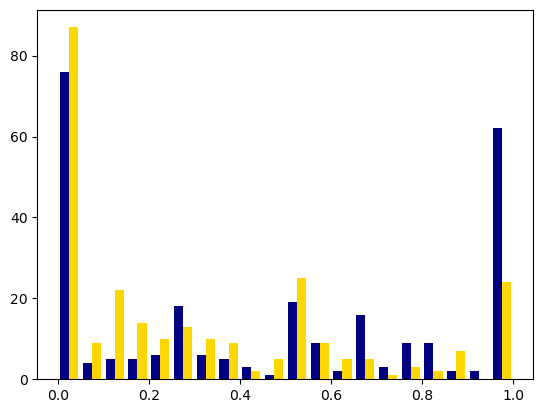

In [160]:
fig,ax = plt.subplots()
ax.hist(x=df1,bins=20, color=['navy', 'gold'])

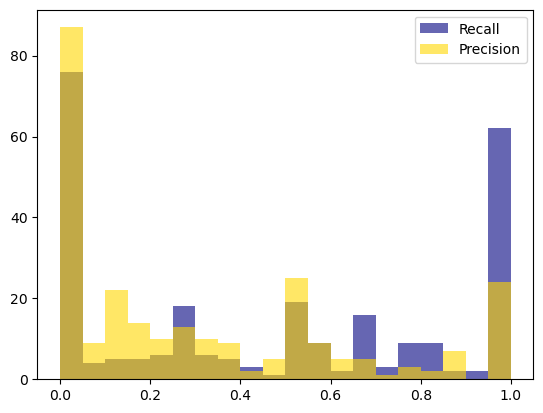

In [208]:
plt.xlim([-0.05,1.05])
plt.xticks(np.arange(0.0, 1.2, step=0.2))
plt.hist(df1['recall'], 
         alpha=0.6, # the transaparency parameter
         label='Recall', bins=20,
         color='navy')
  
plt.hist(df1['precision'],
         alpha=0.6,
         label='Precision', bins=20,
         color='gold')
  
plt.legend(loc='upper right')
# plt.title('BioModels Species')
# plt.show()
plt.savefig(os.path.join(FIGURE_DIR, 'biomd_spec_hist.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

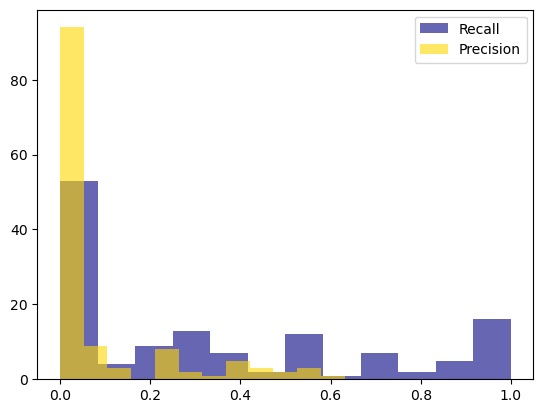

In [209]:
plt.xlim([-0.05,1.05])
plt.xticks(np.arange(0.0, 1.2, step=0.2))
plt.hist(df2['recall'], 
         alpha=0.6, # the transaparency parameter
         label='Recall', bins=12,
         color='navy')
  
plt.hist(df2['precision'],
         alpha=0.6,
         label='Precision', bins=12,
         color='gold')
  
plt.legend(loc='upper right')
# plt.title('BioModels Species')
# plt.show()
plt.savefig(os.path.join(FIGURE_DIR, 'biomd_reac_hist.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

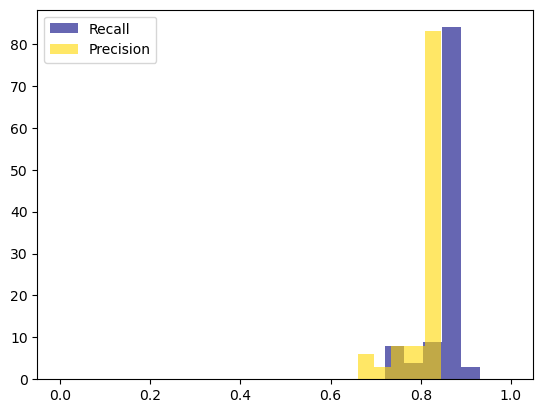

In [210]:
plt.xlim([-0.05,1.05])
plt.xticks(np.arange(0.0, 1.2, step=0.2))
plt.hist(df3['recall'], 
         alpha=0.6, # the transaparency parameter
         label='Recall', bins=5,
         color='navy')
  
plt.hist(df3['precision'],
         alpha=0.6,
         label='Precision', bins=5,
         color='gold')
  
plt.legend(loc='upper left')
# plt.show()
plt.savefig(os.path.join(FIGURE_DIR, 'bigg_spec_hist.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

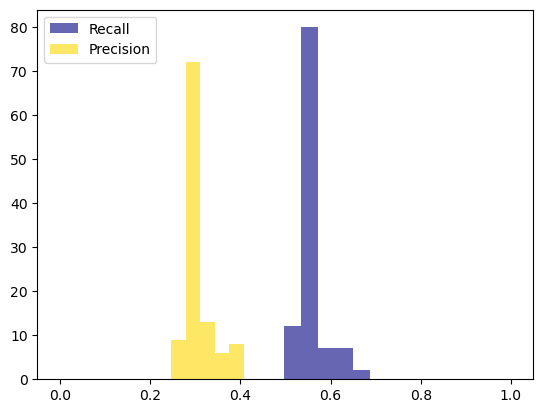

In [211]:
plt.xlim([-0.05,1.05])
plt.xticks(np.arange(0.0, 1.2, step=0.2))
plt.hist(df4['recall'], 
         alpha=0.6, # the transaparency parameter
         label='Recall', bins=5,
         color='navy')
  
plt.hist(df4['precision'],
         alpha=0.6,
         label='Precision', bins=5,
         color='gold')
  
plt.legend(loc='upper left')
# plt.show()
plt.savefig(os.path.join(FIGURE_DIR, 'bigg_reac_hist.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)